In [10]:
from sklearn.datasets import load_breast_cancer

bc = load_breast_cancer()

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(bc.data,
                                                    bc.target,
                                                    stratify=bc.target,
                                                    random_state=7)

scaler = StandardScaler()
scaler.fit(x_train)
x_train_zs = scaler.transform(x_train)
x_test_zs = scaler.transform(x_test)
print(x_train_zs.shape, y_test.shape)

(426, 30) (143,)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,049 (8.00 KB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6238 - loss: 0.2036 - val_accuracy: 0.6713 - val_loss: 0.1906
Epoch 2/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6739 - loss: 0.1911 - val_accuracy: 0.6993 - val_loss: 0.1820
Epoch 3/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6864 - loss: 0.1927 - val_accuracy: 0.7413 - val_loss: 0.1745
Epoch 4/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7526 - loss: 0.1789 - val_accuracy: 0.7762 - val_loss: 0.1671
Epoch 5/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8144 - loss: 0.1680 - val_accuracy: 0.7972 - val_loss: 0.1608
Epoch 6/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8136 - loss: 0.1691 - val_accuracy: 0.8322 - val_loss: 0.1547
Epoch 7/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7991 - loss: 0.1663 - val_accuracy: 0.8531 - val_loss: 0.1491
Epoch 8/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8324 - loss: 0.1577 - val_accuracy: 0.8

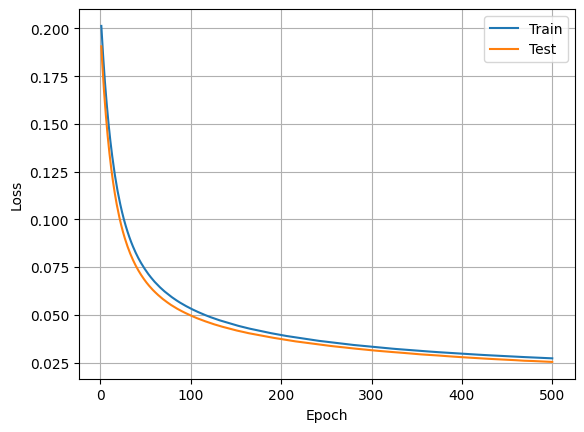

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

bc_nn = Sequential()
bc_nn.add(Input(shape=(30,))) # 속성에 갯수를 지정해줘야 함, 다음 층과 가중치를 연결할 수 있고, model.summary()에서 모델 구조가 계산되고 출력 됨
bc_nn.add(Dense(64, activation='sigmoid')) # hidden layer = fully connected layer
bc_nn.add(Dense(1, activation='sigmoid')) # output layer
bc_nn.summary()
# Output Shape : 배치 사이즈가 안 정해져서 Output Shape에 (None, 64)의 None이라고 나오는거
# Param : 30 * 64 + 64(노드마다 bias 1) = 1984
# Total params: 1,984 (7.75 KB) = Trainable params: 1,984 (7.75 KB)

# 어떻게 학습할건지
bc_nn.compile(loss='mse', optimizer='sgd', metrics=['accuracy']) # 손실 함수, 가중치 업데이트, 평가기준
hist = bc_nn.fit(x_train_zs, y_train,
          validation_data=(x_test_zs, y_test),
          epochs=500)

# 14는 한 epoch 당 처리한 배치(batch)의 개수
# 426/32 = 13.3125
# x_train_zs 갯수/batch size

import matplotlib.pyplot as plt
plt.plot(range(1, 501), hist.history['loss'], label='Train') # x=epoch
plt.plot(range(1, 501), hist.history['val_loss'], label='Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid() # 모눈종이
plt.legend() # 범례
plt.show()


In [16]:
x_test_zs[0].shape, x_test_zs[:1].shape # [0] 슬라이스 하면 (1,30) 2차원이 (30,) 1차원으로 되기 때문에 (n, 30)의 속성으로 갖는 것과 계산이 안 됨

((30,), (1, 30))

In [18]:
# pred = bc_nn.predict(x_test_zs[0]) # -> .reshape(1, 30)으로 만들면 계산 가능
# pred = bc_nn.predict(x_test_zs[0].reshape(1, 30))
pred = bc_nn.predict(x_test_zs[:1]) # 까지로 바꾸면 2차원을 잃어버리지 않음

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


In [19]:
pred # 답은 0, 1 현재 답은 0.963 mse = (답 - 예측)^2 들의 합의 평균
# 하지만 차가 0.07이라고 했을때 제곱을 하면 0.0049로 더 작아짐
# 우리가 테스트할때 bc_nn.compile(loss='mse', 했는데 지금 에폭이 500임에도 오래걸리는건 mse 문제였음

# => 이진 분류 문제인데 손실 함수를 MSE로 하면 학습이 잘 안 되거나 느려질 수 있음.

array([[0.96386516]], dtype=float32)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,049 (8.00 KB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.6270 - loss: 0.6235 - val_accuracy: 0.6364 - val_loss: 0.5874
Epoch 2/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6572 - loss: 0.5776 - val_accuracy: 0.6713 - val_loss: 0.5538
Epoch 3/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7000 - loss: 0.5540 - val_accuracy: 0.7413 - val_loss: 0.5230
Epoch 4/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7891 - loss: 0.5172 - val_accuracy: 0.8252 - val_loss: 0.4964
Epoch 5/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7986 - loss: 0.4944 - val_accuracy: 0.8322 - val_loss: 0.4729
Epoch 6/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7979 - loss: 0.4828 - val_accuracy: 0.8601 - val_loss: 0.4516
Epoch 7/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8191 - loss: 0.4651 - val_accuracy: 0.8811 - val_loss: 0.4318
Epoch 8/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8588 - loss: 0.4389 - val_accuracy: 0.

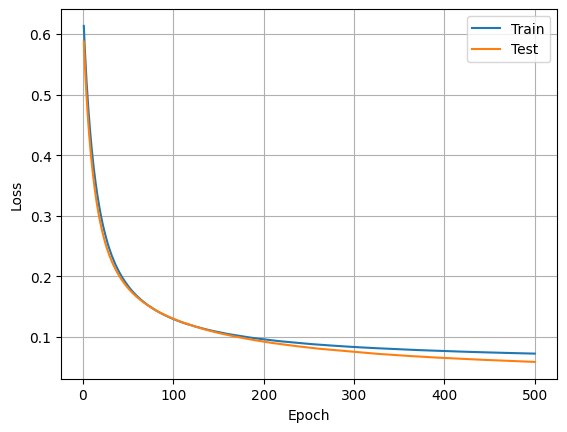

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

bc_nn = Sequential()
bc_nn.add(Input(shape=(30,)))
bc_nn.add(Dense(64, activation='sigmoid'))
bc_nn.add(Dense(1, activation='sigmoid'))
bc_nn.summary()

# mse 대신 binary_crossentropy
bc_nn.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy']) # 손실 함수, 가중치 업데이트, 평가기준
hist = bc_nn.fit(x_train_zs, y_train,
          validation_data=(x_test_zs, y_test),
          epochs=500)

import matplotlib.pyplot as plt
plt.plot(range(1, 501), hist.history['loss'], label='Train')
plt.plot(range(1, 501), hist.history['val_loss'], label='Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,049 (8.00 KB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.3995 - loss: 0.8597 - val_accuracy: 0.3846 - val_loss: 0.6641
Epoch 2/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5179 - loss: 0.6150 - val_accuracy: 0.8881 - val_loss: 0.4585
Epoch 3/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8833 - loss: 0.4334 - val_accuracy: 0.9371 - val_loss: 0.3513
Epoch 4/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9350 - loss: 0.3483 - val_accuracy: 0.9161 - val_loss: 0.2947
Epoch 5/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9364 - loss: 0.2901 - val_accuracy: 0.9161 - val_loss: 0.2594
Epoch 6/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9437 - loss: 0.2585 - val_accuracy: 0.9161 - val_loss: 0.2351
Epoch 7/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9552 - loss: 0.2318 - val_accuracy: 0.9231 - val_loss: 0.2157
Epoch 8/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9531 - loss: 0.2132 - val_accuracy: 0.9231 -

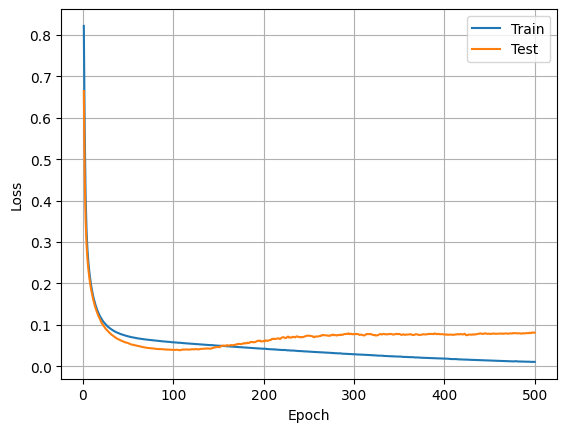

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

bc_nn = Sequential()
bc_nn.add(Input(shape=(30,)))
bc_nn.add(Dense(64, activation='sigmoid'))
bc_nn.add(Dense(1, activation='sigmoid'))
bc_nn.summary()

# sgd는 로컬 미니멈에 갇힐 수 있어, 대신 Momentum의 adam 사용
bc_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # 손실 함수, 가중치 업데이트, 평가기준
hist = bc_nn.fit(x_train_zs, y_train,
          validation_data=(x_test_zs, y_test),
          epochs=500)

import matplotlib.pyplot as plt
plt.plot(range(1, 501), hist.history['loss'], label='Train')
plt.plot(range(1, 501), hist.history['val_loss'], label='Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

# 100 부터 오버피팅됨을 보임

- 손실 함수, 가중치 업데이트 방식을 어떤 걸로 고를지가 중요하다!

시그모이드(sigmoid) 함수 특징
- 출력 범위가 0과 1 사이로 입력값이 크거나 작으면 함수 값이 거의 0 또는 1에 포화됨
- 이 포화 영역에서는 기울기(gradient)가 매우 작아져서 학습이 느려지거나 멈출 수 있음 (vanishing gradient 문제)

그래서 ReLU(Rectified Linear Unit)를 많이 씀.

ReLU 함수:
𝑓
(
𝑥
)
=
max
⁡
(
0
,
𝑥
)
f(x)=max(0,x) (0보다 작으면 0, 크면 그대로 출력)

- 출력이 0 이상이라 음수 영역 포화 문제 없음
- 기울기가 0 또는 1이어서 gradient 소실 문제를 완화

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,049 (8.00 KB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.7845 - loss: 0.4620 - val_accuracy: 0.9441 - val_loss: 0.2736
Epoch 2/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9349 - loss: 0.2721 - val_accuracy: 0.9510 - val_loss: 0.1934
Epoch 3/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9785 - loss: 0.1700 - val_accuracy: 0.9441 - val_loss: 0.1555
Epoch 4/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9669 - loss: 0.1563 - val_accuracy: 0.9580 - val_loss: 0.1317
Epoch 5/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9733 - loss: 0.1297 - val_accuracy: 0.9650 - val_loss: 0.1175
Epoch 6/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9706 - loss: 0.1252 - val_accuracy: 0.9650 - val_loss: 0.1053
Epoch 7/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9820 - loss: 0.1000 - val_accuracy: 0.9720 - val_loss: 0.0967
Epoch 8/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9757 - loss: 0.0927 - val_accuracy: 0.9720 

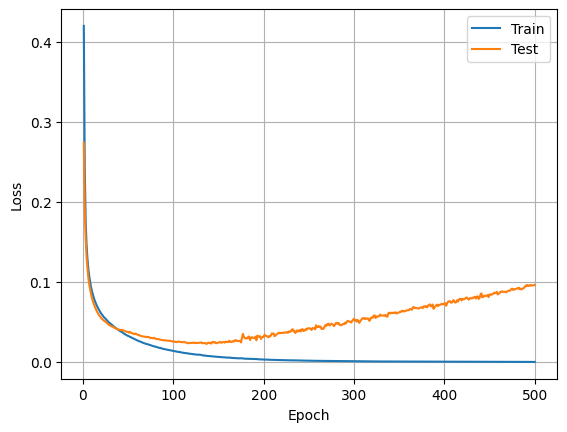

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

bc_nn = Sequential()
bc_nn.add(Input(shape=(30,)))
bc_nn.add(Dense(64, activation='relu')) # 은닉층, ReLU는 기울기 소실 문제 완화 및 학습 속도 향상
bc_nn.add(Dense(1, activation='sigmoid')) # 출력층에 sigmoid (이진 분류용)
bc_nn.summary()

bc_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # 손실 함수, 가중치 업데이트, 평가기준
hist = bc_nn.fit(x_train_zs, y_train,
          validation_data=(x_test_zs, y_test),
          epochs=500)

import matplotlib.pyplot as plt
plt.plot(range(1, 501), hist.history['loss'], label='Train')
plt.plot(range(1, 501), hist.history['val_loss'], label='Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

iris 데이터로 학습해보기

In [24]:
from sklearn.datasets import load_iris

iris = load_iris()

x_train, x_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target,
                                                    stratify=iris.target,
                                                    random_state=7,
                                                    test_size=0.3)

scaler = StandardScaler()
scaler.fit(x_train)
x_train_zs = scaler.transform(x_train)
x_test_zs = scaler.transform(x_test)
print(x_train_zs.shape, y_test.shape)

(105, 4) (45,)


In [ ]:
from tensorflow.keras.utils import to_categorical

print(y_train)
y_train_oh = to_categorical(y_train) # 원-핫 인코딩
y_test_oh = to_categorical(y_test)
print(y_train_oh)
print(y_test_oh.shape)

In [33]:
iris_model = Sequential()
iris_model.add(Input(shape=(4,)))
iris_model.add(Dense(16, activation='relu'))
iris_model.add(Dense(32, activation='relu'))
iris_model.add(Dense(16, activation='relu'))
iris_model.add(Dense(3, activation='softmax'))
# 클래스가 3개이므로 출력 뉴런 수는 3개, softmax는 각 클래스에 대한 확률(0~1)을 출력함
# 정답 레이블이 0, 1, 2인 경우 → 모델이 categorical_crossentropy 손실 함수를 사용한다면,
# 이를 [1,0,0], [0,1,0], [0,0,1] 형태의 원-핫 인코딩으로 변환해야 함
iris_model.summary()

iris_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# categorical_crossentropy는 다중 클래스 문제에서 softmax 확률과 원-핫 인코딩 레이블 간의 cross entropy 계산
iris_model.fit(x_train_zs, y_train_oh,
               validation_data=(x_test_zs, y_test_oh),
               epochs=50)

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,203 (4.70 KB)

 Trainable params: 1,203 (4.70 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - accuracy: 0.4370 - loss: 1.0988 - val_accuracy: 0.5111 - val_loss: 1.0586
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5182 - loss: 1.0291 - val_accuracy: 0.5333 - val_loss: 1.0045
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5724 - loss: 0.9641 - val_accuracy: 0.5778 - val_loss: 0.9546
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6476 - loss: 0.9113 - val_accuracy: 0.7778 - val_loss: 0.9093
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7593 - loss: 0.8798 - val_accuracy: 0.8000 - val_loss: 0.8672
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8626 - loss: 0.8270 - val_accuracy: 0.8222 - val_loss: 0.8271
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8810 - loss: 0.7702 - val_accuracy: 0.8444 - val_loss: 0.7880
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8456 - loss: 0.7526 - val_accuracy: 0.8667 - val_loss: 0.7497

humanactivity로 해보기

In [37]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
import pandas as pd
rootdir = '/content/drive/MyDrive/2025_SeSAC/machine_learning/kaggle_HumanActivityRecog/'
train = pd.read_csv(rootdir+'train.csv',sep=',')
test = pd.read_csv(rootdir+'test.csv',sep=',')

In [51]:
x_train = train.drop(['subject','Activity'], axis=1)
y_train = train.Activity
x_test = test.drop(['subject','Activity'], axis=1)
y_test = test.Activity
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(7352, 561) (7352,) (2947, 561) (2947,)


In [70]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() # 문자열(범주형) 라벨을 정수 인코딩(0,1,2...)으로 변환
# y_train_enc = le.fit_transform(y_train)
le.fit(y_train)
y_train_enc = le.transform(y_train)
y_test_enc = le.transform(y_test)
print(y_train_enc)

[2 2 2 ... 5 5 5]


In [73]:
y_train_oh = to_categorical(y_train_enc) # 정수 인코딩된 라벨을 원-핫 인코딩으로 변환 (수치형만 가능)
y_test_oh = to_categorical(y_test_enc)
print(y_train_oh.shape, y_test_oh.shape)

(7352, 6) (2947, 6)


Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_80 (Dense)                │ (None, 256)            │       143,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_81 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_82 (Dense)                │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,710 (627.77 KB)

 Trainable params: 160,710 (627.77 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7582 - loss: 0.5796 - val_accuracy: 0.9009 - val_loss: 0.2547
Epoch 2/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9437 - loss: 0.1466 - val_accuracy: 0.9382 - val_loss: 0.1494
Epoch 3/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9634 - loss: 0.0966 - val_accuracy: 0.9437 - val_loss: 0.1428
Epoch 4/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9699 - loss: 0.0842 - val_accuracy: 0.9318 - val_loss: 0.1748
Epoch 5/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9697 - loss: 0.0802 - val_accuracy: 0.9118 - val_loss: 0.2503
Epoch 6/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9668 - loss: 0.0840 - val_accuracy: 0.9460 - val_loss: 0.1413
Epoch 7/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9672 - loss: 0.0862 - val_accuracy: 0.9301 - val_loss: 0.2146
Epoch 8/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9761 - loss: 0.0594 - val_accuracy: 

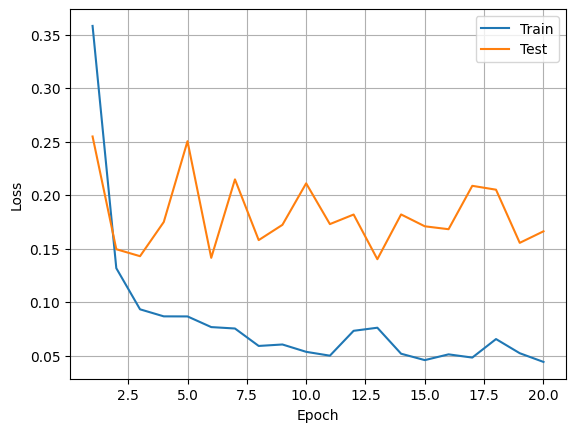

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

ha_nn = Sequential()
ha_nn.add(Input(shape=(561,)))
ha_nn.add(Dense(256, activation='relu'))
ha_nn.add(Dense(64, activation='relu'))
ha_nn.add(Dense(6, activation='softmax'))
ha_nn.summary()

ha_nn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = ha_nn.fit(x_train, y_train_oh,
          validation_data=(x_test, y_test_oh),
          epochs=20)
          # callbacks=[early_stop]) # 조기 종료

import matplotlib.pyplot as plt
plt.plot(range(1, 21), hist.history['loss'], label='Train')
plt.plot(range(1, 21), hist.history['val_loss'], label='Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

1. train의 loss 값이 점점 낮아지면 → 학습 데이터에 대해서는 모델이 점점 더 잘 맞춰지고 있다는 뜻

 → 모델이 학습을 잘 따라가고 있다는 의미 (학습 진행 OK)

2. test의 loss 값이 train의 loss보다 훨씬 높다면 → 과적합(overfitting)의 가능성 있음

 → 즉, 학습 데이터에는 너무 잘 맞지만 새로운 데이터(검증 데이터)에는 일반화가 안 되고 있다는 뜻

원인1. 테스트 데이터가 부족

원인2. 모델이 잘못됨

In [75]:
from tensorflow.keras.callbacks import EarlyStopping

ha_nn = Sequential()
ha_nn.add(Input(shape=(561,)))
ha_nn.add(Dense(256, activation='relu'))
ha_nn.add(Dense(64, activation='relu'))
ha_nn.add(Dense(6, activation='softmax'))
ha_nn.summary()

ha_nn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
esc = EarlyStopping(monitor='val_loss', patience=10) # 학습 중 검증 손실(val_loss)이 더 이상 개선되지 않으면 학습을 자동 중단하는 콜백 함수
hist = ha_nn.fit(x_train, y_train_oh,
          validation_data=(x_test, y_test_oh),
          callbacks=[esc],
          epochs=500)

Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_83 (Dense)                │ (None, 256)            │       143,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_84 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_85 (Dense)                │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,710 (627.77 KB)

 Trainable params: 160,710 (627.77 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7250 - loss: 0.6705 - val_accuracy: 0.8901 - val_loss: 0.2619
Epoch 2/500
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9251 - loss: 0.1821 - val_accuracy: 0.9294 - val_loss: 0.1618
Epoch 3/500
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9550 - loss: 0.1062 - val_accuracy: 0.9281 - val_loss: 0.1721
Epoch 4/500
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9752 - loss: 0.0681 - val_accuracy: 0.9393 - val_loss: 0.1551
Epoch 5/500
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9678 - loss: 0.0778 - val_accuracy: 0.9298 - val_loss: 0.1800
Epoch 6/500
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9704 - loss: 0.0814 - val_accuracy: 0.9291 - val_loss: 0.2256
Epoch 7/500
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9733 - loss: 0.0675 - val_accuracy: 0.9308 - val_loss: 0.2077
Epoch 8/500
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9781 - loss: 0.0617 - val_accu